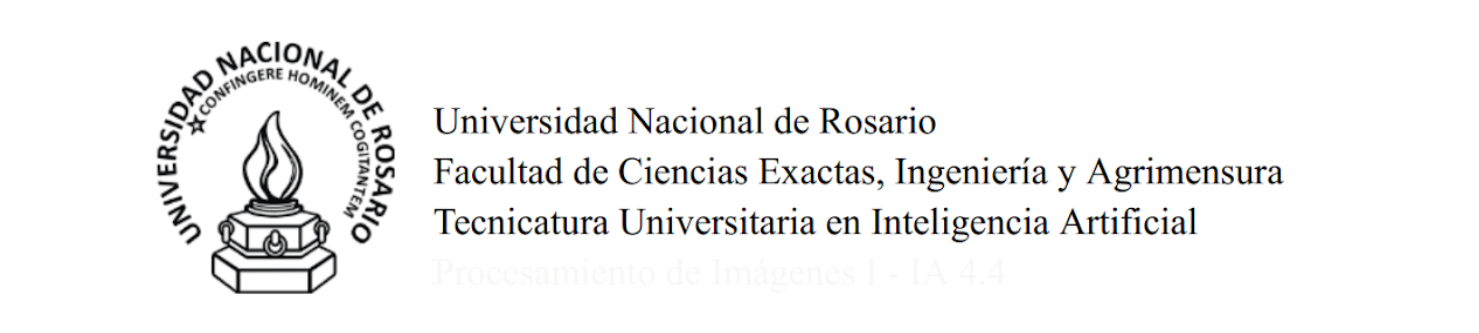


# TUIA - NLP - 2025
# TRABAJO PRÁCTICO 1 - Parte 2

Alumna:
- **Nancy Lucía Cima**
- **C-7379/2**

Docentes:
 - Manson, Juan Pablo.
 - Geary, Alan.
 - Sollberger, Dolores.
 - Ferrucci, Costantino.

## Pautas generales:
● El trabajo deberá ser realizado de manera individual.

● Las librerías que utilicen deben estar (la primera vez que se cargan) sobre el código
donde se las utiliza, no todas juntas al inicio.

● Se debe entregar un informe en el cual se incluya las justificaciones y un vínculo a
los archivos que permitan reproducir el proyecto. Recomendamos gitlab o github
para tal fin. Debe realizarse en colab y ser entregado en el formato de Jupyter
Notebook .ipynb, dentro de un repositorio. Guardar una vez ejecutado.

● Para la solución del ejercicio puede utilizar todas las herramientas presentadas en
las unidades 1, 2 y 3 de la materia.

● La entrega de la misma tendrá fecha límite el miércoles 21 de mayo a las 23:59.

● En el repositorio de entrega deben ser compartidos con los docentes de la cátedra en el rol de editor


## EJERCICIO 1:
En este apartado solamente se solicita cargar el repositorio asignado a cada estudiante.

El repositorio es la base de la información a utilizar, en el caso de no encontrar la
información necesaria se puede agregar contenido extra, siempre y cuando sea previo a la
realización de los ejercicios en función de mantener el orden.

La carga en colab puede ser mediante un archivo ZIP cargado manualmente o mediante
código.

---

Primero, se sube un archivo ZIP, se descomprime en una carpeta llamada `Calico` y se verifica su contenido.


In [ ]:
from google.colab import files
import os

# Subir ZIP
uploaded = files.upload()

# Obtener nombre del archivo subido
filename = list(uploaded.keys())[0]
print(f"Descomprimiendo: {filename}")

# Crear carpeta de destino
dest_folder = "Calico"
os.makedirs(dest_folder, exist_ok=True)

# Descomprimir ZIP
!unzip -q "$filename" -d "$dest_folder"

# Verificar contenido
print(f"Verificando contenido: ")
!ls "$dest_folder"

Saving Calico.zip to Calico.zip
Descomprimiendo: Calico.zip
Verificando contenido: 
Calico


Además, se ve como estan organizadas las carpertas y archivos.

In [ ]:
# Mostramos la distribucion de carpetas
print("\nEstructura dataset:\n")

# Imprimir la estructura de directorios y archivos dentro de la carpeta de destino
!ls -R "$dest_folder"


Estructura dataset:

Calico:
Calico

Calico/Calico:
codigo	datos  informe

Calico/Calico/codigo:
extraccion-calico.ipynb  imgs  pdfs

Calico/Calico/codigo/imgs:
creditos-calico.png

Calico/Calico/codigo/pdfs:
deu_Speelhulp_Calico_v1_Dutch.pdf
eng_Calico_Condensed_Rules.pdf
eng_Calico_Rules_First_Edition.pdf
fra_Calico_Button_Tile_Ring_French.pdf
fra_Calico_Rules_First_Edition_French.pdf
ita_Calico_Regolamento.pdf
spa_calico.pdf
spa_Calico_Reglas_a_la_JcK.pdf

Calico/Calico/datos:
estadisticas  informacion  relaciones

Calico/Calico/datos/estadisticas:
estadisticas-calico.csv

Calico/Calico/datos/informacion:
 articulo-misutmeeple_calico.txt
 foro-calico.txt
 pdf-deu_Speelhulp_Calico_v1_Dutch.txt
 pdf-eng_Calico_Condensed_Rules.txt
 pdf-eng_Calico_Rules_First_Edition.txt
 pdf-fra_Calico_Button_Tile_Ring_French.txt
 pdf-fra_Calico_Rules_First_Edition_French.txt
 pdf-ita_Calico_Regolamento.txt
 pdf-spa_Calico_Reglas_a_la_JcK.txt
 pdf-spa_calico.txt
'video-calico_-_partida_rápida_(5_minut

## EJERCICIO 2
Apoyándose en la sección de información. Separa en fragmentos un texto extenso extraído
y vectoriza cada fragmento con alguno de los modelos de embedding vistos en clases.

Luego realiza un análisis de similitud de texto ingresando varias frases a buscar
semánticamente, compare distintas técnicas de distancias vistas en clases, elija la mejor y
justifique la razón por la que esa técnica se ajusta para este tipo de búsquedas.

OPCIONAL: Visualizar en 3D aplicando PCA o t-SNE la ubicación de los fragmentos y la
query ingresada vectorizada en el espacio. Realizar una observación sobre la visualización.

---

Aquí, se leen los archivos `.txt` de la carpeta información y se los divido en fragmentos más cortos.

In [113]:
import os

def load_and_split_texts(folder_path, max_length=100):
    """
    Carga todos los archivos .txt de una carpeta y divide su contenido en fragmentos.

    Parámetros:
    - folder_path (str): Ruta a la carpeta que contiene los archivos de texto.
    - max_length (int): Longitud máxima de cada fragmento de texto (en caracteres). Por defecto es 100.

    Retorna:
    - list: Lista de fragmentos de texto generados a partir de los archivos.
    """

    if not os.path.exists(folder_path):
        raise ValueError(f"La carpeta '{folder_path}' no existe.")

    fragments = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                text = file.read()
                fragments += split_text(text, max_length)
    return fragments

def split_text(text, max_length=100):
    """
    Divide un texto largo en fragmentos más pequeños (chuncks) basados en oraciones.

    Parámetros:
    - text (str): El texto completo a dividir.
    - max_length (int): Longitud máxima de cada fragmento (en caracteres). Por defecto es 100.

    Retorna:
    - list: Lista de fragmentos de texto.
    """

    sentences = text.split('. ')
    chunks = []
    current_chunk = ""
    for sentence in sentences:
        if len(current_chunk) + len(sentence) <= max_length:
            current_chunk += sentence + ". "
        else:
            chunks.append(current_chunk.strip())
            current_chunk = sentence + ". "
    chunks.append(current_chunk.strip())
    return chunks


 A continucación, se vectorizan los fragmentos con sentence-transformers.

In [114]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
fragments = load_and_split_texts('Calico/Calico/datos/informacion')
embeddings = model.encode(fragments, show_progress_bar=True)

Batches:   0%|          | 0/165 [00:00<?, ?it/s]

Ahora, se compararan distintas técnicas de distancias y se evaluara la mas conveniente.  En particular, se convierte una frase de entrada en vector y la comparo con los fragmentos usando diferentes metricas. Luego, se muestran los más parecidos según su puntuación en cada metrica.

In [47]:
!pip install python-Levenshtein

In [48]:
!pip install jellyfish

In [130]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
import Levenshtein
import jellyfish
import numpy as np

# Funciones de similitud adicionales
def jaccard_similarity(query, text) -> float:
    """
    Calcula la similitud de Jaccard entre dos textos.

    La similitud de Jaccard se define como el tamaño de la intersección
    dividido por el tamaño de la unión de los conjuntos de palabras de ambos textos.

    Parameters:
        query (str): Texto de consulta.
        text (str): Texto contra el que se compara.

    Returns:
        float: Similitud de Jaccard entre 0 y 1.
    """
    set1 = set(query.split())
    set2 = set(text.split())
    intersection = set1 & set2
    union = set1 | set2
    return len(intersection)/len(union) if union else 0

def dice_similarity(query, text) -> float:
    """
    Calcula la similitud de Dice entre dos textos usando bigramas.

    La fórmula de Dice es: 2 * |intersección| / (|bigrams_query| + |bigrams_text|)

    Parameters:
        query (str): Texto de consulta.
        text (str): Texto contra el que se compara.

    Returns:
        float: Similitud de Dice entre 0 y 1.
    """
    bigrams_q = set(query[i:i+2] for i in range(len(query)-1))
    bigrams_t = set(text[i:i+2] for i in range(len(text)-1))
    intersection = bigrams_q & bigrams_t
    return (2*len(intersection))/(len(bigrams_q)+len(bigrams_t)) if (bigrams_q or bigrams_t) else 0

def levenshtein_similarity(query, text) -> float:
    """
    Calcula una similitud basada en la distancia de Levenshtein.

    La similitud se define como 1 menos la distancia normalizada
    por la longitud máxima de los textos.

    Parameters:
        query (str): Texto de consulta.
        text (str): Texto contra el que se compara.

    Returns:
        float: Similitud basada en Levenshtein entre 0 y 1.
    """
    max_len = max(len(query), len(text))
    if max_len == 0:
        return 0
    return 1 - Levenshtein.distance(query, text)/max_len

def jaro_winkler_similarity(text1: str, text2: str) -> float:
    """Calcula la similitud Jaro-Winkler entre dos textos usando la librería jellyfish."""
    return jellyfish.jaro_winkler_similarity(text1, text2)

def calcular_similitudes(query_text, fragments, query_vec, embeddings):
    """
    Calcula múltiples métricas de similitud entre una consulta y una lista de textos.

    Incluye métricas basadas en embeddings (coseno, euclidiana, manhattan)
    y métricas textuales (Jaccard, Dice, Levenshtein, Jaro-Winkler).

    Parameters:
        query_text (str): Texto de la consulta.
        fragments (List[str]): Lista de fragmentos de texto a comparar.
        query_vec (np.ndarray): Vector de embedding del texto de la consulta. Forma: (1, dim).
        embeddings (np.ndarray): Matriz de embeddings de los fragmentos. Forma: (n, dim).

    Returns:
        dict: Diccionario con nombre de cada métrica como clave y lista de puntuaciones como valor.
    """
    # Métricas basadas en embeddings
    cos_sim = cosine_similarity(query_vec, embeddings)[0]
    eucl_sim = -euclidean_distances(query_vec, embeddings)[0]
    manh_sim = -manhattan_distances(query_vec, embeddings)[0]

    # Métricas basadas en texto
    jaccard = [jaccard_similarity(query_text, t) for t in fragments]
    dice = [dice_similarity(query_text, t) for t in fragments]
    levenshtein = [levenshtein_similarity(query_text, t) for t in fragments]
    jaro_winkler = [jaro_winkler_similarity(query_text, t) for t in fragments]

    return {
        'Coseno': cos_sim,
        'Euclídea': eucl_sim,
        'Manhattan': manh_sim,
        'Jaccard': jaccard,
        'Dice': dice,
        'Levenshtein': levenshtein,
        'Jaro-Winkler': jaro_winkler
    }

def print_top(similarity, name, fragments):
    """
    Imprime los 3 fragmentos con mayor puntuación de similitud para una métrica dada.

    Parameters:
        similarity (List[float]): Lista de puntuaciones de similitud.
        name (str): Nombre de la métrica usada.
        fragments (List[str]): Lista de fragmentos de texto correspondientes.

    Returns:
        None
    """
    print(f"\nTop 3 con {name}:")
    indices = np.argsort(similarity)[-3:][::-1]
    for i in indices:
        print(f"Score: {similarity[i]:.4f} - Fragmento: {fragments[i][:50]}...")

# Ejemplo de uso
if __name__ == "__main__":
    """
    Módulo para calcular diferentes métricas de similitud entre una consulta textual
    y una lista de fragmentos de texto, tanto a nivel de embeddings como a nivel textual.

    Métricas implementadas:
    - Cosine Similarity (con embeddings)
    - Euclidean Distance (negada)
    - Manhattan Distance (negada)
    - Jaccard Similarity (con palabras)
    - Dice Similarity (con bigramas)
    - Levenshtein Similarity (normalizada)
    - Jaro-Winkler Similarity

    Donde:
    # - query_text: texto de la consulta
    # - fragments: lista de textos de fragmentos
    # - query_vec: embedding de la consulta
    # - embeddings: lista de embeddings de fragmentos
    """

    query_text = "Estrategias" #input("Introduce la frase a analizar: ")
    query_vec = model.encode([query_text])
    similitudes = calcular_similitudes(query_text, fragments, query_vec, embeddings)

    for nombre, valores in similitudes.items():
        print_top(valores, nombre, fragments)


Top 3 con Coseno:
Score: 0.5618 - Fragmento: Success....
Score: 0.5541 - Fragmento: Ciascuno dei 10 scenari ti mostrerà quale Tessera
...
Score: 0.5497 - Fragmento: ...

Top 3 con Euclídea:
Score: -4.2488 - Fragmento: Doch mitnichten, es muss fleissig gegrübelt werden...
Score: -4.2621 - Fragmento: Ciascuno dei 10 scenari ti mostrerà quale Tessera
...
Score: -4.3558 - Fragmento: You definitely can be strategic and actually feel ...

Top 3 con Manhattan:
Score: -59.8415 - Fragmento: Doch mitnichten, es muss fleissig gegrübelt werden...
Score: -61.6008 - Fragmento: Ciascuno dei 10 scenari ti mostrerà quale Tessera
...
Score: -62.2563 - Fragmento: You definitely can be strategic and actually feel ...

Top 3 con Jaccard:
Score: 0.0000 - Fragmento: ...
Score: 0.0000 - Fragmento: ] A 7
....
Score: 0.0000 - Fragmento: Chen, Jeremy Davis, Gates Dowd, Randy Flynn, Sarah...

Top 3 con Dice:
Score: 0.2979 - Fragmento: Hate drafting is a tactical/strategic ploy....
Score: 0.2545 - Fragmento: Cal

###Análisis y justificación
Al comparar distintos tipos de métricas para medir similitud entre textos, se nota varias diferencias importantes:

- Métricas basadas en embeddings (como coseno, euclídea o manhattan) tienen la gran ventaja de que capturan similitudes a nivel de significado, no solo de palabras. Lo malo es que dependen de modelos de embeddings entrenados, como los de Sentence Transformers.

- Métricas léxicas (como Jaccard o Dice) son mucho más simples y rápidas de usar, pero solo comparan las palabras tal cual están escritas, así que no entienden el contexto ni el significado.

- Métricas de edición (como Levenshtein o Jaro-Winkler) son útiles para detectar errores de tipeo o nombres mal escritos, pero tampoco entienden lo que se quiere decir.

Después de probar y analizar, se decidio elegir la similitud del coseno usando embeddings porque los embeddings representan el significado de los textos, y el coseno mide muy bien qué tan parecidos son en ese sentido. Es una técnica estándar en NLP y da buenos resultados incluso si los textos usan palabras distintas pero quieren decir lo mismo.

En conclusión, la similitud del coseno con embeddings es la mejor opción para hacer búsquedas semánticas, porque va más allá de las palabras exactas y realmente entiende el significado del texto. Las otras métricas pueden servir en casos puntuales, pero no son suficientes para análisis semántico profundo.

Como paso siguiente, se visualizara en 3D aplicando PCA la ubicación de los fragmentos y la query ingresada vectorizada en el espacio.

In [131]:
def plot_embeddings_3d(embeddings, query_vector, title="Visualización 3D de fragmentos vs consulta"):
    import torch

    # Convertir a numpy si son tensores de PyTorch
    if isinstance(embeddings, torch.Tensor):
        embeddings = embeddings.detach().cpu().numpy()
    if isinstance(query_vector, torch.Tensor):
        query_vector = query_vector.detach().cpu().numpy()

    # Asegurar que query_vector sea un array plano
    query_vector = np.array(query_vector).flatten()

    # Combinar embeddings y vector de consulta
    all_vecs = np.vstack([*embeddings, query_vector])

    # Escalar los vectores antes de aplicar PCA
    scaler = StandardScaler()
    all_vecs_scaled = scaler.fit_transform(all_vecs)

    # Reducción de dimensionalidad con PCA
    pca = PCA(n_components=3)
    points = pca.fit_transform(all_vecs_scaled)

    # Crear figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Graficar fragmentos (azules)
    ax.scatter(points[:-1, 0], points[:-1, 1], points[:-1, 2],
               c='blue', label='Fragmentos', alpha=0.1, s=20)

    # Graficar consulta (roja)
    ax.scatter(points[-1, 0], points[-1, 1], points[-1, 2],
               c='red', label='Consulta', s=120, marker='X')
    ax.text(points[-1, 0], points[-1, 1], points[-1, 2],
            'Consulta', color='red', fontsize=10)

    # Añadir leyenda y título
    ax.legend()
    plt.title(title)
    plt.show()


<IPython.core.display.Javascript object>

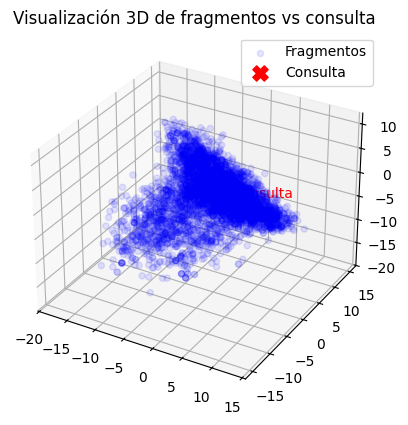

In [141]:
# Ejemplo de llamada a la función
plot_embeddings_3d(
    embeddings=embeddings,  # Lista de vectores de fragmentos
    query_vector=query_vec,   # Vector de consulta individual
    title="Visualización 3D de fragmentos vs consulta"
)


Los fragmentos (puntos azules) forman una nube densa en el espacio 3D, lo que sugiere que el contenido de tu base de datos tiene cierta coherencia temática o estructural. La distribución no es completamente esférica, sino que tiene una forma más alargada, indicando que hay direcciones específicas en el espacio semántico donde se concentra más información
El punto rojo (consulta) se encuentra relativamente cerca del cluster principal de fragmentos, pero no exactamente en el centro. Esta posición sugiere que la consulta tiene relación semántica con el contenido de la base de datos.

## EJERCICIO 3
Apoyándose nuevamente en la sección de información. Recoge un texto extenso extraído,
divídelos en fragmentos, luego realiza extracciones de sustantivos (POS) y categoriza estos
sustantivos (NER), a continuación realiza una búsqueda de similitud filtrando por
sustantivos, compara las distintas técnicas de distancias vistas en clases, elija la mejor y
justifique la razón por la que esta técnica se ajusta para este tipo de búsquedas.

---


El codigo de este ejercicio se compone por una clase principal BuscadorAvanzado que encapsula toda la funcionalidad de carga, procesamiento, búsqueda y análisis. A continuación, se detallan sus principales componentes:

 1. Carga y fragmentación de textos: Los textos son leídos desde una carpeta especificada y divididos en fragmentos con el objetivo de facilitar búsquedas a nivel granular.

2. Extracción lingüística: Para cada fragmento, se realiza la extracción de sustantivos (mediante POS tagging con spaCy), utilizados para filtrar los fragmentos más relevantes frente a una consulta. Luego, se realiza el reconocimiento de entidades nombradas (NER), categorizando los sustantivos extraidos.

3. Embeddings semánticos: Cada fragmento se representa mediante un vector generado con el modelo all-MiniLM-L6-v2 de la librería SentenceTransformers.

4. Consulta y filtrado: A partir de una consulta del usuario, se extraen los sustantivos presentes y se filtran los fragmentos que contengan al menos un sustantivo en común con la consulta, reduciendo el espacio de búsqueda.

5. Comparación por métricas: Se evalúa la similitud entre la consulta y los fragmentos seleccionados mediante las siguientes métricas: Similitud Coseno, Distancia Euclidiana, Distancia Manhattan, Jaccard, Dice, Levenshtein y Jaro-Winkler

6. Resultados: El sistema devuelve un DataFrame con los fragmentos más relevantes ordenados por similitud coseno. Cada resultado incluye también las entidades reconocidas y las puntuaciones obtenidas con las distintas métricas.


In [55]:
!pip install unidecode

In [56]:
!pip install spacy
!python -m spacy download es_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 888.2 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [57]:
import spacy
import re
import pandas as pd
import Levenshtein
import jellyfish
from typing import List, Dict
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
from sentence_transformers import SentenceTransformer

# Funciones de limpieza
def limpiar_texto(texto: str) -> str:
    """
    Limpia el texto eliminando saltos de línea innecesarios, espacios múltiples,
    caracteres de control y texto vacío o basura.
    """
    texto = re.sub(r'[^\x20-\x7EñÑáéíóúÁÉÍÓÚüÜ]', ' ', texto)  # Caracteres válidos
    texto = re.sub(r'\s+', ' ', texto)  # Unifica espacios
    return texto.strip()

# Clase principal de búsqueda
class BuscadorSustantivo:
    """
    Clase que implementa un sistema de búsqueda avanzado basado en embeddings y similitud textual.
    Realiza extracción de sustantivos y entidades, y compara distintas métricas de similitud.
    """

    def __init__(self, folder_path: str):
        """
        Inicializa el buscador cargando y fragmentando los textos, y precalculando embeddings y sustantivos.
        """
        self.fragments = load_and_split_texts(folder_path)
        cleaned_fragments = [limpiar_texto(f) for f in self.fragments]
        self.fragments = list(set(cleaned_fragments)) # Uso set para quedarme con los elementos unicos y vuelvo a fomrato lista
        self.nlp = spacy.load("es_core_news_lg")
        self.model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
        self.embeddings = self.model.encode(self.fragments)

        # Extraer sustantivos y entidades para cada fragmento
        self.sustantivos = [self._extraer_sustantivos(f) for f in self.fragments]
        self.entidades = [self._extraer_entidades(f) for f in self.fragments]

    def _extraer_sustantivos(self, texto: str) -> List[str]:
        """
        Extrae sustantivos lematizados únicos de un texto.
        """
        doc = self.nlp(texto)
        return list(set([token.lemma_.lower()
                         for token in doc if token.pos_ in ("NOUN", "PROPN")]))

    def _extraer_entidades(self, texto: str) -> List[str]:
        """
        Extrae entidades nombradas del texto (NER).
        """
        doc = self.nlp(texto)
        return [ent.text for ent in doc.ents]

    def _calcular_metricas(self, query: str, indices: List[int]) -> Dict[str, List[float]]:
        """
        Calcula múltiples métricas de similitud entre el query y los fragmentos filtrados.
        """
        return {
            'Jaccard': [jaccard_similarity(query, self.fragments[i]) for i in indices],
            'Dice': [dice_similarity(query, self.fragments[i]) for i in indices],
            'Levenshtein': [levenshtein_similarity(query, self.fragments[i]) for i in indices],
            'Jaro-Winkler': [jaro_winkler_similarity(query, self.fragments[i]) for i in indices],
        }

    def buscar(self, query: str, top_n: int = 5) -> pd.DataFrame:
        """
        Realiza una búsqueda avanzada basada en embeddings y métricas, filtrando por sustantivos del query.
        """
        query_vec = self.model.encode([query])[0]
        sustantivos_query = self._extraer_sustantivos(query)

        # Filtrar fragmentos que contengan al menos un sustantivo del query
        indices_filtrados = [
            i for i, sust in enumerate(self.sustantivos)
            if any(s in sust for s in sustantivos_query)
        ]

        if not indices_filtrados:
            return pd.DataFrame()

        # Similitudes de embeddings
        embeddings_filtrados = self.embeddings[indices_filtrados]
        sim_cos = cosine_similarity([query_vec], embeddings_filtrados)[0]
        sim_euclid = -euclidean_distances([query_vec], embeddings_filtrados)[0]
        sim_manhattan = -manhattan_distances([query_vec], embeddings_filtrados)[0]

        # Similitudes textuales
        metricas_texto = self._calcular_metricas(query, indices_filtrados)

        # Construcción del DataFrame de resultados
        resultados = pd.DataFrame({
            'Fragmento': [self.fragments[i] for i in indices_filtrados],
            'Entidades': [self.entidades[i] for i in indices_filtrados],
            'Coseno': sim_cos,
            'Euclidiana': sim_euclid,
            'Manhattan': sim_manhattan,
            **metricas_texto
        })

        # Ordenar por similitud coseno (mejor métrica para embeddings)
        return resultados.sort_values(by='Coseno', ascending=False).head(top_n)

if __name__ == "__main__":
    # Ruta a la carpeta con textos
    CARPETA_TEXTOS = "Calico/Calico/datos/informacion"

    # Inicializar buscador
    buscador = BuscadorSustantivo(CARPETA_TEXTOS)

    # Consulta de ejemplo
    query = "estrategias de juego en equipo"

    # Realizar búsqueda
    resultados = buscador.buscar(query)

    # Mostrar resultados
    print("\nResultados multimétrico:")
    print(resultados)


Resultados multimétrico:
                                            Fragmento  \
24               Ejemplo: en un juego de 3 jugadores.   
23  Para esta reseña se ha utilizado una copia de ...   
22  HP Y SAA A AR A AOS FIN DEL JUEGO + PUNTUACIÓN...   
25  Eso hace que salvo excepciones se premie al ju...   
35  Finalmente, se escoge a un jugador como inicia...   

                                 Entidades    Coseno  Euclidiana  Manhattan  \
24                                      []  0.676209   -0.804725 -12.740995   
23    [Flatout Games, Importante, Opinión]  0.637175   -0.851851 -13.496844   
22  [HP Y SAA, Tablero de colcha, Losetas]  0.635370   -0.853968 -13.466403   
25                                      []  0.617421   -0.874733 -13.935031   
35        [Contenido de la caja del juego]  0.609576   -0.883656 -13.764878   

     Jaccard      Dice  Levenshtein  Jaro-Winkler  
24  0.333333  0.440678     0.305556      0.570370  
23  0.078947  0.270968     0.123288      0.550270  


### Justificación de la métrica seleccionada

La similitud coseno sigue siendo la métrica más efectiva para embeddings de texto debido a que es la métrica más efectiva para comparar embeddings de texto porque mide el ángulo entre dos vectores, enfocándose en la dirección (significado) y no en la magnitud (tamaño) del vector.

Los embeddings representan el significado como direcciones en un espacio vectorial, por lo que esta métrica captura mejor la relación semántica entre textos.

Otras métricas como la distancia euclidiana son sensibles a la magnitud y menos confiables en espacios de alta dimensión, mientras que las métricas basadas en conjuntos (Jaccard, Dice) se usan para similitud léxica, no semántica.

En resumen, esta más alineada con cómo funcionan los modelos de lenguaje para representar significado.

## EJERCICIO 4
Mediante detección de idioma, separar los archivos en distintos lenguajes y guardar esa
información en un dataframe.

---

Este código recorre todos los archivos `.txt` que están en una carpeta y detecta el idioma en que está escrito cada uno usando la librería `langdetect`.

 Primero lee el contenido completo de cada archivo, luego intenta identificar el idioma, y finalmente guarda los resultados en un DataFrame. Si no puede detectar el idioma, los clasifica como "desconocido". También, muestra cuántos archivos hay por idioma, lo cual es útil para verificar si todos los textos están en el mismo idioma o si hay una mezcla y la proporcion de archivos en cada idioma.

In [58]:
!pip install langdetect

In [59]:
import os
import pandas as pd
from langdetect import detect

# Ruta a la carpeta donde están los archivos
folder_path = "Calico/Calico/datos/informacion"

# Función para detectar idioma
def detectar_idioma(texto):
    try:
        return detect(texto)
    except:
        return "desconocido"

# Leer cada archivo y detectar el idioma del contenido completo
idiomas_archivos = []

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        with open(os.path.join(folder_path, filename), "r", encoding="utf-8") as f:
            texto = f.read()
            idioma = detectar_idioma(texto)
            idiomas_archivos.append({"Archivo": filename, "Idioma": idioma})

# Crear DataFrame
df_idiomas_archivos = pd.DataFrame(idiomas_archivos)

# Mostrar conteo de idiomas
print(df_idiomas_archivos["Idioma"].value_counts())
df_idiomas_archivos.head(10)

Idioma
en    8
es    5
it    3
fr    3
pt    2
de    2
nl    1
Name: count, dtype: int64


,Archivo,Idioma
0,video-partida_rápida.txt,en
1,pdf-ita_Calico_Regolamento.txt,it
2,video-instrucciones_italiano.txt,it
3,video-review_portugués.txt,pt
4,video-instrucciones_alemán.txt,de
5,video-review_alemán.txt,de
6,pdf-deu_Speelhulp_Calico_v1_Dutch.txt,nl
7,wikipedia-calico.txt,en
8,video-calico_-_partida_rápida_(5_minutos).txt,en
9,video-instrucciones_portugués.txt,pt


## EJERCICIO 5
En el caso de las reseñas realizadas por usuarios, utiliza análisis de sentimientos con
modelos pre entrenados y guarda la clasificación predecida de cada reseña.

Luego, crea un sistema de búsquedas por similitud semántica y que permita filtrar por
sentimiento para obtener.

---

En este codigo, primero se recibe una consulta escrita por el usuario. Luego, se buscan textos similares a esa consulta dentro de un conjunto de textos (por ejemplo, comentarios en foros del juego o reseñas del mismo), utilizando embeddings para medir la similitud semántica.

A continuación, se filtran esos textos por sentimiento: positivo, negativo o neutro. Para cada tipo de sentimiento:

   * Se calcula los 5 textos más parecidos a la consulta original.
   * Se muestra una tabla con dos columnas:

     * Similitud: cuánto se parece el texto a la consulta.
     * Fragmento: parte del texto encontrado.

Para que el texto no se vea desordenado, se recortan los fragmentos largos a una cantidad fija de caracteres.

In [60]:
from transformers import pipeline
from sentence_transformers import SentenceTransformer
import pandas as pd
import torch
import re

def cargar_textos(tipo, lista_rutas):
  if tipo == "cometarios":
    df = extraer_comentarios_desde_txt(lista_rutas[0])
  if tipo == "reseñas":
      df = extraer_resenas_desde_txt(lista_rutas)
  return df

def extraer_resenas_desde_txt(lista_rutas):
  resenas = []
  for ruta in lista_rutas:
      with open(ruta, 'r', encoding='utf-8') as archivo:
          texto = archivo.read()
      resenas.append(texto)
  resenas = [r.strip().replace('\n', ' ') for r in resenas]
  df = pd.DataFrame(resenas, columns=['Fragmento'])
  return df

# Leer el archivo y extraer los comentarios
def extraer_comentarios_desde_txt(ruta_archivo):
    """
    Extrae los comentarios de un archivo de texto donde cada comentario está precedido por 'Comentario X:'.

    Parámetros:
    ruta_archivo (str): Ruta al archivo de texto.

    Retorna:
    DataFrame: Contiene una columna 'Fragmento' con los textos de los comentarios.
    """
    with open(ruta_archivo, 'r', encoding='utf-8') as archivo:
        texto = archivo.read()

    # Buscar todos los comentarios (Comentario 1:, Comentario 2:, etc.)
    comentarios = re.findall(r'Comentario \d+:\n(.+?)(?=\n\n|========================================|$)', texto, re.DOTALL)
    comentarios = [c.strip().replace('\n', ' ') for c in comentarios]  # Limpiar saltos de línea

    df = pd.DataFrame(comentarios, columns=['Fragmento'])
    return df

# Análisis de sentimientos
def analizar_sentimientos(df, columna_texto='Fragmento'):
    """
    Clasifica el sentimiento de cada fragmento de texto como Positivo, Neutro o Negativo usando un modelo BERT multilingüe.

    Parámetros:
    df (DataFrame): DataFrame que contiene los fragmentos de texto.
    columna_texto (str): Nombre de la columna que contiene los textos.

    Retorna:
    DataFrame: Igual al original pero con una nueva columna 'Sentimiento'.
    """
    clasificador = pipeline(
        "sentiment-analysis",
        model="nlptown/bert-base-multilingual-uncased-sentiment",
        device=0 if torch.cuda.is_available() else -1,  # Usar GPU si está disponible
        truncation=True
    )

    textos = df[columna_texto].tolist()
    resultados = clasificador(textos)

    # Mapeo de estrellas a etiquetas de sentimiento
    def mapear_sentimiento(resultado):
        stars = int(resultado['label'].split()[0])
        if stars <= 2: return 'Negativo'
        if stars == 3: return 'Neutro'
        return 'Positivo'

    df['Sentimiento'] = [mapear_sentimiento(r) for r in resultados]
    return df

# Generar embeddings
def generar_embeddings(df, columna='Fragmento'):
    """
    Genera vectores de embeddings para cada fragmento de texto usando un modelo multilingüe de Sentence Transformers.

    Parámetros:
    df (DataFrame): DataFrame con los textos.
    columna (str): Columna del texto a vectorizar.

    Retorna:
    tuple: (modelo de embeddings, tensor de embeddings)
    """
    modelo = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
    embeddings = modelo.encode(df[columna].tolist(), convert_to_tensor=True, show_progress_bar=True)
    return modelo, embeddings

# Búsqueda semántica
def buscar_similitud_semantica(df, embeddings, modelo, consulta, sentimiento=None, top_k=5):
    """
    Busca los fragmentos de texto más similares a una consulta utilizando embeddings y filtrando por sentimiento (opcional).

    Parámetros:
    df (DataFrame): DataFrame que contiene los fragmentos de texto y sus sentimientos.
    embeddings (tensor): Embeddings precomputados de los fragmentos de texto.
    modelo (SentenceTransformer): Modelo usado para generar embeddings.
    consulta (str): Texto de la consulta del usuario.
    sentimiento (str, opcional): Filtra resultados por 'Positivo', 'Neutro' o 'Negativo'.
    top_k (int): Número de resultados más similares a devolver.

    Retorna:
    DataFrame: Contiene las columnas 'Fragmento', 'Similitud' y 'Sentimiento' con los top resultados.
    """
    # Si no se especifica sentimiento, se consideran todos los comentarios
    mascara = torch.ones(len(df), dtype=torch.bool) if not sentimiento else df['Sentimiento'] == sentimiento
    embeddings_filtrados = embeddings[mascara]

    with torch.no_grad():
        consulta_embed = modelo.encode(consulta, convert_to_tensor=True)
        similitudes = torch.nn.functional.cosine_similarity(consulta_embed, embeddings_filtrados)

    # Obtener los índices de los comentarios más similares
    top_indices = similitudes.topk(min(top_k, len(similitudes))).indices

    resultados = []
    for idx in top_indices:
        original_idx = df[mascara].iloc[idx.item()].name
        resultados.append((
            df.iloc[original_idx]['Fragmento'],
            similitudes[idx].item(),
            df.iloc[original_idx]['Sentimiento']
        ))

    return pd.DataFrame(resultados, columns=['Fragmento', 'Similitud', 'Sentimiento'])

# Función auxiliar para mostrar los resultados
def truncar(texto, longitud=120):
    """
    Acorta un texto si supera una cierta longitud, agregando puntos suspensivos al final.

    Parámetros:
    texto (str): Texto a truncar.
    longitud (int): Máxima longitud permitida del texto.

    Retorna:
    str: Texto truncado si supera la longitud especificada.
    """
    return texto if len(texto) <= longitud else texto[:longitud] + "..."

In [61]:
def mostrar_resultados_similitud_por_sentimiento(df_analizado, embeddings, modelo, consulta, top_k=5, longitud_truncamiento=120):
    """
    Muestra los resultados de similitud semántica clasificados por sentimiento, mostrando los fragmentos más relevantes.

    Args:
        df_analizado (pandas.DataFrame): DataFrame con los textos analizados y sus metadatos
        embeddings (numpy.ndarray): Array con los embeddings de los fragmentos de texto
        modelo (SentenceTransformer): Modelo de embeddings usado para la búsqueda de similitud
        consulta (str): Texto de consulta para la búsqueda semántica
        top_k (int, optional): Cantidad de resultados a mostrar por categoría. Default: 5
        longitud_truncamiento (int, optional): Longitud máxima para truncar fragmentos. Default: 120

    Returns:
        None: Imprime los resultados directamente en la salida
    """
    # Iterar sobre los tres tipos de sentimiento y mostrar los top 5 fragmentos más similares
    for sentimiento, emoji in [("Positivo", "🟢"), ("Negativo", "🔴"), ("Neutro", "🟡")]:
        resultados = buscar_similitud_semantica(
            df_analizado, embeddings, modelo, consulta, sentimiento=sentimiento, top_k=top_k
        )

        # Función de truncamiento inline
        truncar = lambda texto, max_len: (texto[:max_len-3] + '...') if len(texto) > max_len else texto

        # Truncar fragmentos largos para una presentación más clara
        resultados['Fragmento'] = resultados['Fragmento'].apply(lambda x: truncar(x, longitud_truncamiento))

        # Mostrar resultados
        print(f"\n{emoji} Top {top_k} resultados con sentimiento {sentimiento.upper()}:")
        print(resultados[['Similitud', 'Fragmento']].to_string(index=False))

Ejemplo de uso cargando todos los comentarios realizados en foros disponibles en el dataset de datos cargados.

In [62]:
# Leer archivo y extraer comentarios
df_comentarios = cargar_textos("cometarios", ['Calico/Calico/datos/informacion/foro-calico.txt'])

# Analizar sentimientos de los comentarios
df_analizado = analizar_sentimientos(df_comentarios)

# Generar embeddings para los comentarios
modelo, embeddings = generar_embeddings(df_analizado)

# Buscar por similitud semántica con una consulta específica y sentimiento positivo
consulta = "Me gustó mucho el juego"

# Mostrar resultados de similitud para cada tipo de sentimiento
mostrar_resultados_similitud_por_sentimiento(df_analizado, embeddings, modelo, consulta)

Device set to use cpu


Batches:   0%|          | 0/44 [00:00<?, ?it/s]


🟢 Top 5 resultados con sentimiento POSITIVO:
 Similitud                                                                                                             Fragmento
  0.744211 You did a great job . I didn't know what to expect from the game, but when I played it I said wow! Really, that good!
  0.709871                                                                     Absolutely brilliant! Love it. Relaxing gameplay.
  0.704912                                                        That was really fun! I just played three games straight, hehe.
  0.660004                                      Thank you, this is great! I've already backed the game and can't wait to get it.
  0.651620                                                                        I'm glad you liked it. It's really quite good.

🔴 Top 5 resultados con sentimiento NEGATIVO:
 Similitud                                                                                                                Fragmento
  

Ejemplo de uso cargando todos las reseñas disponibles en el dataset de datos cargados.

In [63]:
# Crear una lista de rutas hacia todas las reseñas disponibles en el dataset
BASE_DIR = "Calico/Calico/datos/informacion/"
ARCHIVOS = [
    "video-reseña_español.txt",
    "video-review_alemán.txt",
    "video-review_ingles.txt",
    "video-review_italiano.txt",
    "video-review_portugués.txt"
]
rutas = []

for archivo in ARCHIVOS:
    rutas.append(BASE_DIR + archivo)

# Leer archivo y extraer reseñas
df_resenas = cargar_textos("reseñas", rutas)

# Analizar sentimientos de las reseñas
df_analizado = analizar_sentimientos(df_resenas)

# Generar embeddings para las reseñas
modelo, embeddings = generar_embeddings(df_analizado)

# Buscar por similitud semántica con una consulta específica y sentimiento positivo
consulta = "Me gustó mucho el juego"

# Mostrar resultados de similitud para cada tipo de sentimiento
mostrar_resultados_similitud_por_sentimiento(df_analizado, embeddings, modelo, consulta)

Device set to use cpu


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


🟢 Top 5 resultados con sentimiento POSITIVO:
 Similitud                                                                                                                Fragmento
  0.288337 V-Review_Alemán [Musik] herzlich willkommen zu einer neuen ausgabe von der preis spielt testern mit dabei und michael...

🔴 Top 5 resultados con sentimiento NEGATIVO:
 Similitud                                                                                                                Fragmento
  0.373211 V-Review_Portugués E aí o Olá Sou Marcos vídeo de hoje vim apresentar pra vocês calico tá um jogo lançamento aí na sp...
  0.365275 V-Review_Italiano [Musica] me li trovate amici il gioco di cui vi parlerò oggi ha sbancato allo scorso stile digital ...

🟡 Top 5 resultados con sentimiento NEUTRO:
 Similitud                                                                                                                Fragmento
  0.359882 V-Reseña_Español Hola jugadores Bienvenidos a metamorphosis c

## EJERCICIO 6
Crea un set de datos de consultas (más de 300 preguntas en total) y categorizalas entre la
fuente de datos que pueda llegar a responder esa pregunta entre estadísticas,
información y relaciones.
Por ejemplo:
- ¿Cómo gano en el ajedrez? -> Información
- ¿Quién trabajó para el ta-te-ti? -> Relaciones
- ¿Qué puntaje tienen las damas? -> Estadística

A continuación, transforma esas consultas en vectores y entrena un modelo de clasificación
(a gusto del estudiante) en donde pueda predecir la categoría a través de la consulta
ingresada.

Agregar métricas y análisis durante todo el desarrollo, trabaje en varios modelos y
comparelos.

---

Ya se confecciono un dataset con preguntas sobre el juego clasificadas con la categoria correspondinte.

A continuación, se carga dicho dataset y se ve la cantidad de datos pertenecientes a cada categoria.

In [64]:
import pandas as pd

# Cargar datos
df = pd.read_csv("/content/preguntas_calico.csv")

# Ver distribución de categorías
print(df["Categoría"].value_counts())

Categoría
Informacion    144
Estadística    100
Relaciones     100
Name: count, dtype: int64


El siguiente paso es el preprocesamiento del texto, eliminando caracteres especiales, convirtiendo a minúsculas y tokenizando.

In [81]:
import re
import nltk


In [82]:
def preprocesar_texto(texto):
    """
    Preprocesa el texto eliminando caracteres especiales, convirtiendo a minúsculas y eliminando stopwords.

    Parámetros:
    texto (str): Texto a preprocesar.

    Retorna:
    str: Texto preprocesado.
    """
    # Eliminar caracteres especiales y convertir a minúsculas
    texto = re.sub(r"[^\w\s]", "", texto.lower())
    # Tokenizar y eliminar stopwords (sin stemming)
    tokens = [word for word in texto.split()]
    return " ".join(tokens)

df["pregunta_limpia"] = df["Pregunta"].apply(preprocesar_texto)

Se aplica vectorización con TF-IDF a las preguntas preprocesadas.

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
X = vectorizer.fit_transform(df["pregunta_limpia"])
y = df["Categoría"]

Se divide el dataset en datos de entrenamiento y de prueba de forma estratificada y se aplica balanceo en los datos de entrenamiento.

In [84]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Balanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train_encoded)

Finalmente, se realiza el entrenamiento de modelos con ajuste de hiperparámetros. En particular, se probaran dos modelos distintos:

Modelo 1: SVM Lineal (Optimizado)

In [89]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

model_svm = LinearSVC(C=10, class_weight="balanced", random_state=42)  # C ajustado manualmente
model_svm.fit(X_train_res, y_train_res)
y_pred_svm = model_svm.predict(X_test)

# Invertimos los labels codificados a los nombres originales
y_test_labels = le.inverse_transform(y_test_encoded)
y_pred_labels = le.inverse_transform(y_pred_svm)

print("SVM Lineal Optimizado:")
print(classification_report(y_test_labels, y_pred_labels))

SVM Lineal Optimizado:
              precision    recall  f1-score   support

 Estadística       0.88      0.70      0.78        20
 Informacion       0.73      0.83      0.77        29
  Relaciones       0.75      0.75      0.75        20

    accuracy                           0.77        69
   macro avg       0.78      0.76      0.77        69
weighted avg       0.78      0.77      0.77        69



Modelo 2: Random Forest con Ponderación de Clases

In [90]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    class_weight="balanced",  # Ajusta pesos automáticamente
    n_estimators=200,
    max_depth=10,
    random_state=42
)
model_rf.fit(X_train_res, y_train_res)
y_pred_rf = model_rf.predict(X_test)

# Invertimos los labels codificados a los nombres originales
y_test_labels = le.inverse_transform(y_test_encoded)
y_pred_labels = le.inverse_transform(y_pred_rf)

print("Random Forest:")
print(classification_report(y_test_labels, y_pred_labels))

Random Forest:
              precision    recall  f1-score   support

 Estadística       0.67      0.50      0.57        20
 Informacion       0.59      0.79      0.68        29
  Relaciones       0.73      0.55      0.63        20

    accuracy                           0.64        69
   macro avg       0.66      0.61      0.63        69
weighted avg       0.65      0.64      0.63        69



Se probara con preguntas de ejemplo

In [95]:
def clasificar_pregunta(pregunta, modelo, vectorizer):
    """
    Clasifica una pregunta en una de las categorías dadas.

    Parámetros:
    pregunta (str): Pregunta a clasificar.
    modelo: Modelo de clasificación preentrenado.
    vectorizer: Vectorizador de texto preentrenado.

    Retorna:
    str: Categoría predicha.
    """
    pregunta_limpia = preprocesar_texto(pregunta)
    pregunta_vec = vectorizer.transform([pregunta_limpia])
    pred_clase_cod = modelo.predict(pregunta_vec)
    pred_clase_real = le.inverse_transform(pred_clase_cod)
    return pred_clase_real[0]

In [96]:
# Ejemplo 1
pregunta_ejemplo = "¿Cuántos puntos da una flor en Calico?"
categoria = clasificar_pregunta(pregunta_ejemplo, model_svm, vectorizer)
print(f"Categoría predicha: {categoria}")  # Salida esperada: "Estadística"

Categoría predicha: Estadística


In [97]:
# Ejemplo 2
pregunta_ejemplo = "¿How do I place tiles in Calico?"
categoria = clasificar_pregunta(pregunta_ejemplo, model_svm, vectorizer)
print(f"Categoría predicha: {categoria}")  # Salida esperada: "Informacion"

Categoría predicha: Informacion


In [98]:
# Ejemplo 3
pregunta_ejemplo = "¿Quién diseñó Pradera?"
categoria = clasificar_pregunta(pregunta_ejemplo, model_svm, vectorizer)
print(f"Categoría predicha: {categoria}")  # Salida esperada: "Relaciones"

Categoría predicha: Relaciones


In [99]:
# Ejemplo 4
pregunta_ejemplo = "How many users have Pradera on their wishlist?"
categoria = clasificar_pregunta(pregunta_ejemplo, model_svm, vectorizer)
print(f"Categoría predicha: {categoria}")  # Salida esperada: "Estadística"

Categoría predicha: Estadística
